<a href="https://colab.research.google.com/github/AJ-Horch/grounded_data_analyst/blob/main/analsying_moive_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
# need to open the raw github file to import the file
admissions_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/admissions.csv"
admissions = pd.read_csv(admissions_url)

In [79]:
admissions.head()

,Year,Month,Admissions (million)
0,2018,January,16.2
1,2018,February,16.1
2,2018,March,13.5
3,2018,April,15.5
4,2018,May,13.7


In [80]:
genres_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/genres.csv"
distributors_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/distributors.csv"

genres = pd.read_csv(genres_url)
distributors = pd.read_csv(distributors_url)

genres.head()


,Year,Genre,Number of\nreleases,Gross box\noffice\n(£ million),Top performing title,Number of releases,Gross box office (£ million)
0,2018,Action,77.0,361.3,Avengers: Infinity War,NaN,NaN
1,2018,Animation,46.0,242.2,Incredibles 2,NaN,NaN
2,2018,Drama,246.0,154.1,A Star Is Born,NaN,NaN
3,2018,Comedy,144.0,88.3,Johnny English Strikes Again,NaN,NaN
4,2018,Biopic,5.0,78.5,Bohemian Rhapsody,NaN,NaN


In [81]:
distributors.head()

,Year,Distributor,Market share\n(%),Films on release\nin 2018,Box office gross\n(£ million),Market Share,Flimns on release,Box office gross (£ million),Market share,Films on release
0,2018,Walt Disney,23.6,24.0,325.6,NaN,NaN,NaN,NaN,NaN
1,2018,Universal,19.5,40.0,268.5,NaN,NaN,NaN,NaN,NaN
2,2018,20th Century Fox,14.5,28.0,199.3,NaN,NaN,NaN,NaN,NaN
3,2018,Warner Bros,13.9,31.0,191.4,NaN,NaN,NaN,NaN,NaN
4,2018,Sony,10.7,33.0,146.8,NaN,NaN,NaN,NaN,NaN


### Divide the dataset
Divide the dataset into three periods: pre-COVID, COVID, Post-Covid. To do this I'll create a date column

In [82]:
admissions.tail()

,Year,Month,Admissions (million)
43,2021,August,10.4
44,2021,September,6.5
45,2021,October,16.4
46,2021,November,8.8
47,2021,December,13.5


I need to add a spacebetween the day and month for the next bit of code to work

In [83]:
import re
def add_space_to_date(text):
    # This regex looks for a number followed immediately by a letter
    return re.sub(r'(\d+)([A-Za-z])', r'\1 \2', text)

# Example usage
admissions['date'] = admissions['date'].apply(add_space_to_date)

KeyError: 'date'

In [ ]:
admissions.head()

In [ ]:
admissions['date'] = pd.to_datetime(admissions['date'])

In [ ]:
admissions.info()

In [ ]:
admissions.head()

In [84]:
COVID_START_DATE = datetime.datetime(2020, 3, 1)
LOCKDOWN_END_DATE = datetime.datetime(2021, 7, 1)


In [91]:

admissions["date"] = (
    "1 " +
    admissions["Month"] +
    " " +
    admissions["Year"].astype(str)
)

admissions["date"] = pd.to_datetime(admissions["date"], format="%d %B %Y")
admissions.head()

,Year,Month,Admissions (million),date
0,2018,January,16.2,2018-01-01
1,2018,February,16.1,2018-02-01
2,2018,March,13.5,2018-03-01
3,2018,April,15.5,2018-04-01
4,2018,May,13.7,2018-05-01


In [ ]:
admissions.tail()

Apply the cutoff dates to the data. I'll use the Categorial data type in pandas to ensure the correct order is observed when sorting; otherwise, these periods would be sorted alphabetcially.

In [92]:
admissions.loc[admissions['date'] <= COVID_START_DATE, "covid_period"] = 'pre-COVID'
admissions.loc[admissions['date'].between(COVID_START_DATE, LOCKDOWN_END_DATE, 'left'), 'covid_period'] = 'during COVID'
admissions.loc[admissions['date'] >= LOCKDOWN_END_DATE, 'covid_period'] = 'post-lockdown'

# make it categorical
admissions['covid_period'] = (
    pd.Categorical(
        admissions['covid_period'],
        categories=['pre-COVID', 'during COVID', 'post-lockdown'],
        ordered=True
    )
)

admissions['covid_period'].value_counts(dropna=False)

,count
covid_period,
pre-COVID,26
during COVID,16
post-lockdown,6


In [ ]:
admissions.tail(10)

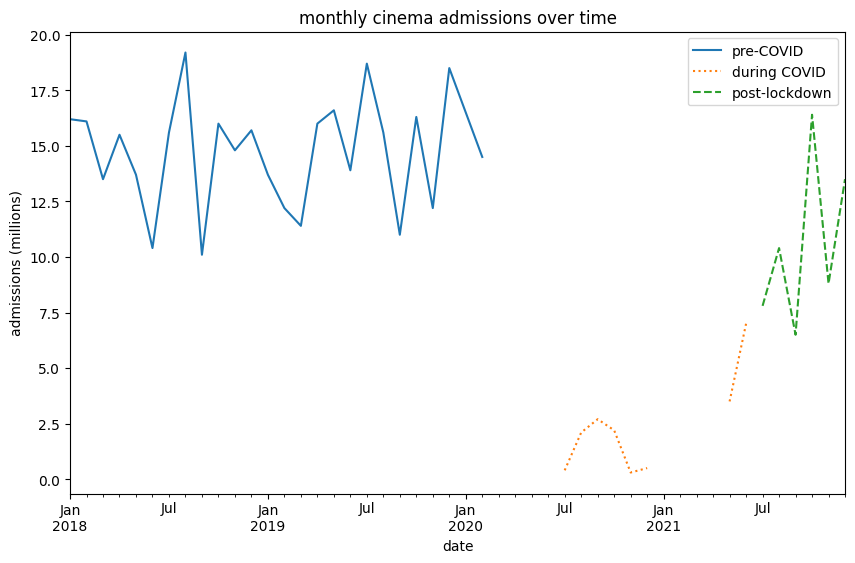

In [99]:
fig, axis = plt.subplots(figsize=(10, 6))

linestyles = ['solid', 'dotted', 'dashed']

for idx, covid_period in enumerate(admissions['covid_period'].value_counts().index):
  (
      admissions
      .query(f"covid_period=='{covid_period}'")
      .set_index("date")
      ["Admissions (million)"]
      .plot(ax=axis, label=covid_period, linestyle=linestyles[idx])
  )

axis.set(
      title="monthly cinema admissions over time",
      ylabel="admissions (millions)"
  )

axis.legend()

plt.show()




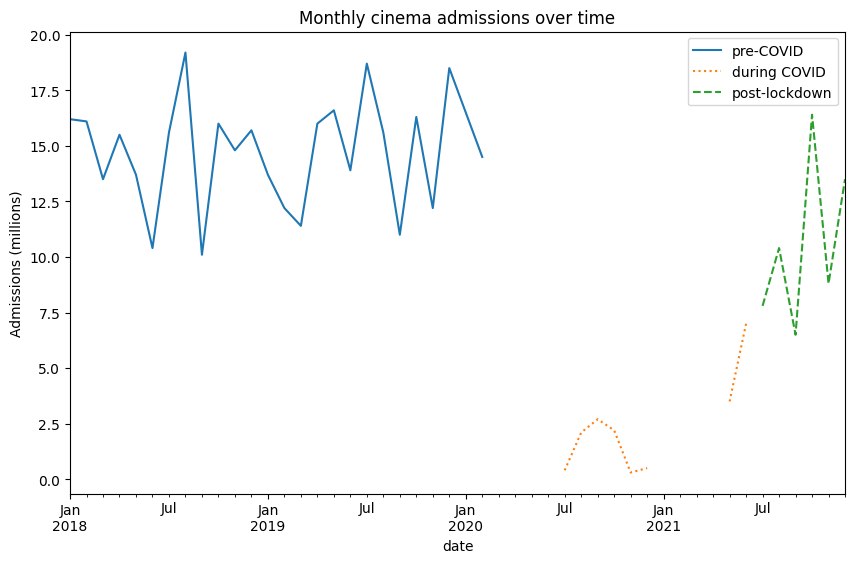

In [98]:
fig, axis = plt.subplots(figsize=(10, 6))

linestyles = ["solid", "dotted", "dashed"]

for idx, covid_period in enumerate(admissions["covid_period"].value_counts().index):
    (
        admissions
        .query(f"covid_period=='{covid_period}'")
        .set_index("date")
        ["Admissions (million)"]
        .plot(ax=axis, label=covid_period, linestyle=linestyles[idx])
    )

axis.set(
    title="Monthly cinema admissions over time",
    ylabel="Admissions (millions)"
)

axis.legend()

plt.show()